In [1]:
import cv2
import numpy as np
import scipy
from scipy.ndimage import convolve
from scipy import signal

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpig

In [3]:
blade=mpig.imread("C:/Users/Asus/Desktop/emma-watson.jpg")

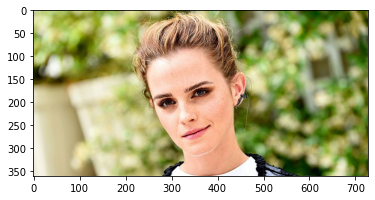

In [121]:
plt.imshow(blade)

In [5]:
blade

array([[[209, 217, 193],
        [207, 216, 189],
        [206, 215, 186],
        ...,
        [ 84, 118,  34],
        [ 87, 118,  38],
        [ 92, 121,  41]],

       [[208, 214, 188],
        [207, 213, 187],
        [207, 213, 185],
        ...,
        [ 80, 112,  27],
        [ 86, 115,  31],
        [ 90, 117,  36]],

       [[203, 209, 181],
        [204, 211, 180],
        [205, 212, 179],
        ...,
        [ 79, 108,  18],
        [ 86, 112,  25],
        [ 91, 115,  29]],

       ...,

       [[236, 234, 211],
        [235, 233, 210],
        [235, 233, 210],
        ...,
        [114, 108,  32],
        [116, 109,  31],
        [117, 108,  31]],

       [[236, 234, 211],
        [235, 233, 210],
        [235, 233, 210],
        ...,
        [121, 115,  39],
        [122, 114,  39],
        [123, 114,  37]],

       [[236, 234, 211],
        [235, 233, 210],
        [235, 233, 210],
        ...,
        [125, 119,  43],
        [127, 119,  44],
        [127, 118,  43]]

In [123]:
blade.shape

(360, 728, 3)

#Luminosity Gray 

In [136]:
gray = lambda rgb : np.dot(rgb[... , :3] , [0.21,0.72,0.07]) 
gray= gray(blade)  
gray=gray/(np.max(gray)/255)

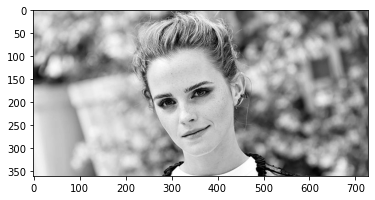

In [137]:
plt.imshow(gray,cmap='gray')

In [102]:
gray

array([[213.64, 212.22, 211.08, ..., 104.98, 105.89, 109.31],
       [210.92, 209.92, 209.78, ...,  99.33, 103.03, 105.66],
       [205.78, 207.36, 208.22, ...,  95.61, 100.45, 103.94],
       ...,
       [232.81, 231.81, 231.81, ..., 103.94, 105.01, 104.5 ],
       [232.81, 231.81, 231.81, ..., 110.94, 110.43, 110.5 ],
       [232.81, 231.81, 231.81, ..., 114.94, 115.43, 114.64]])

In [103]:
blade2=blade.copy()

# Average Gray

In [104]:
gray2=(blade[:,:,0]+blade[:,:,1]+blade[:,:,2])/3


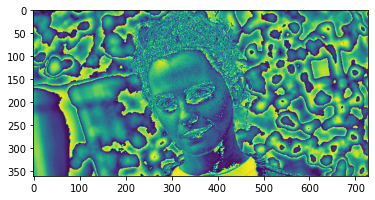

In [105]:
plt.imshow(gray2)

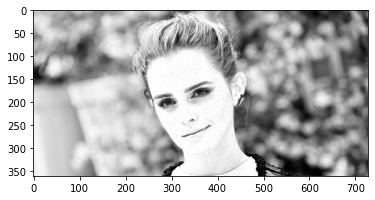

In [106]:
red=blade2[:,:,0]
plt.imshow(red,cmap=plt.get_cmap('gray'), vmin=0, vmax=255)

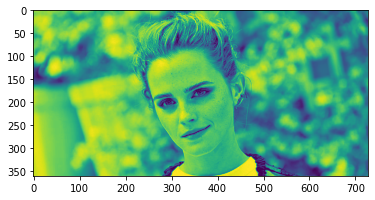

In [107]:
green=blade2[:,:,1]
plt.imshow(green)

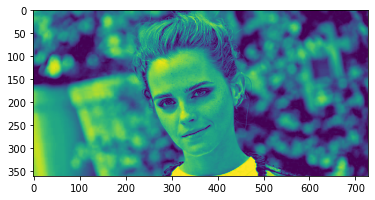

In [108]:
blue=blade2[:,:,2]
plt.imshow(blue)

In [109]:
(h,w,d)=blade.shape

# Blurring


In [8]:
Medianblur=np.asarray([[1,1,1],[1,1,1],[1,1,1]])/9

In [9]:
conv=signal.convolve2d(gray,Medianblur,"same")
conv=conv/(np.max(conv)/255.0)# normalising

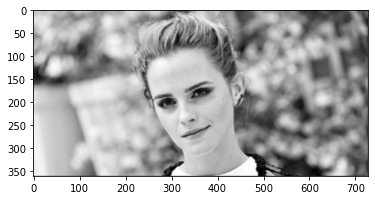

In [10]:
plt.imshow(conv,cmap='gray')

#Sobel operator 

In [11]:
sobelv=np.asarray([[-1,0,1],[-2,0,2],[-1,0,1]])
sobelh=sobelv.T

In [12]:
edgeh=signal.convolve2d(conv,sobelh,"same")

In [13]:
edgeh=edgeh/(np.max(edgeh)/255)

# Horizontal edges

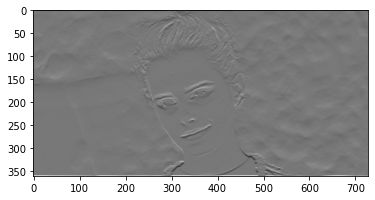

In [14]:
plt.imshow(edgeh,cmap=plt.get_cmap('gray'))

# Vertical Edges

In [15]:
edgev=signal.convolve2d(conv,sobelv,"same")
edgev=edgev/(np.max(edgev)/255)

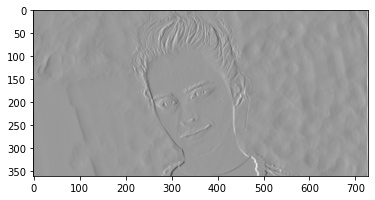

In [16]:
plt.imshow(edgev,cmap='gray')

In [20]:
type(edgev)

numpy.ndarray

In [21]:
edgev.shape

(360, 728)

In [17]:
edge=(edgeh**2+edgev**2)

In [28]:
final=pow(edge,0.5)

In [29]:
final=final/(np.max(final)/255)

In [24]:
edgeh2=edgeh.astype(np.uint8)

In [25]:
edgev2=edgev.astype(np.uint8)

In [26]:
edge2=np.bitwise_or(edgeh2,edgev2)

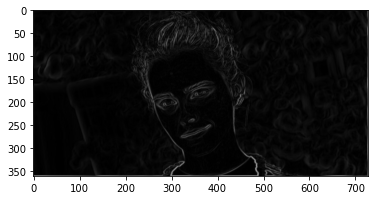

In [30]:
plt.imshow(final,cmap='gray')

# Non max suppression

In [33]:
def non_max_suppression(img, D):
    M, N = img.shape
    Z = np.zeros((M,N), dtype=np.int32)
    angle = D * 180. / np.pi
    angle[angle < 0] += 180

    
    for i in range(1,M-1):
        for j in range(1,N-1):
            try:
                q = 255
                r = 255
                
               #angle 0
                if (0 <= angle[i,j] < 22.5) or (157.5 <= angle[i,j] <= 180):
                    q = img[i, j+1]
                    r = img[i, j-1]
                #angle 45
                elif (22.5 <= angle[i,j] < 67.5):
                    q = img[i+1, j-1]
                    r = img[i-1, j+1]
                #angle 90
                elif (67.5 <= angle[i,j] < 112.5):
                    q = img[i+1, j]
                    r = img[i-1, j]
                #angle 135
                elif (112.5 <= angle[i,j] < 157.5):
                    q = img[i-1, j-1]
                    r = img[i+1, j+1]

                if (img[i,j] >= q) and (img[i,j] >= r):
                    Z[i,j] = img[i,j]
                else:
                    Z[i,j] = 0

            except IndexError as e:
                pass
    return Z  

In [34]:
m,n=edge.shape

In [35]:
d = np.zeros((m,n), dtype=np.float32)

In [36]:
import math

In [85]:
for i in range(0,m):
    for j in range(0,n):
        if(edgeh[i,j]!=0):
            d[i,j]=math.atan(edgev[i,j]/edgeh[i,j])
        else:
            d[i,j]=1.5708
        

In [114]:
z=non_max_suppression(final,d)

In [115]:

z=z/(np.max(z)/255)

In [116]:
type(z)

numpy.ndarray

# Resultant Image

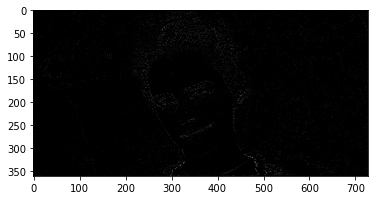

In [117]:
plt.imshow(z,cmap='gray')

# Applying thresholding to get more details and binarize

In [138]:
for x in range(0, z.shape[0]):
    for y in range(0, z.shape[1]):
        if(z[x][y]>20):
            z[x][y]=255
        else:
            z[x][y]=0.0
        



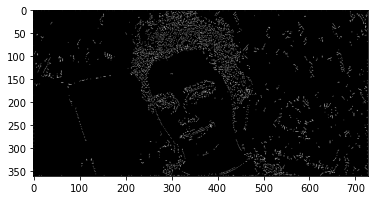

In [139]:
plt.imshow(z,cmap='gray')